In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("data.csv")

In [3]:
data.head(1)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-10-09,115.279999,117.0,114.919998,116.970001,116.222481,100506900


##Summary

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       252 non-null    object 
 1   Open       252 non-null    float64
 2   High       252 non-null    float64
 3   Low        252 non-null    float64
 4   Close      252 non-null    float64
 5   Adj Close  252 non-null    float64
 6   Volume     252 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB


In [5]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,132.047382,133.423691,130.605714,132.041746,131.686555,9.610568e+07
std,11.046097,10.968939,11.075379,11.057846,11.222588,3.247330e+07
min,109.110001,110.680000,107.320000,108.769997,108.074883,4.639770e+07
25%,123.475000,124.849998,121.764997,123.199999,122.649681,7.455655e+07
50%,130.334999,131.685005,129.005005,130.864997,130.296272,8.991345e+07
75%,142.827499,144.189995,140.819999,142.499996,142.240574,1.116616e+08
max,156.979996,157.259995,154.389999,156.690002,156.690002,2.623305e+08


In [10]:
df = data.copy()
df = df.iloc[:,1:]

##Histogram

In [19]:
columns = df.columns.values
len(columns)//3 +1

3

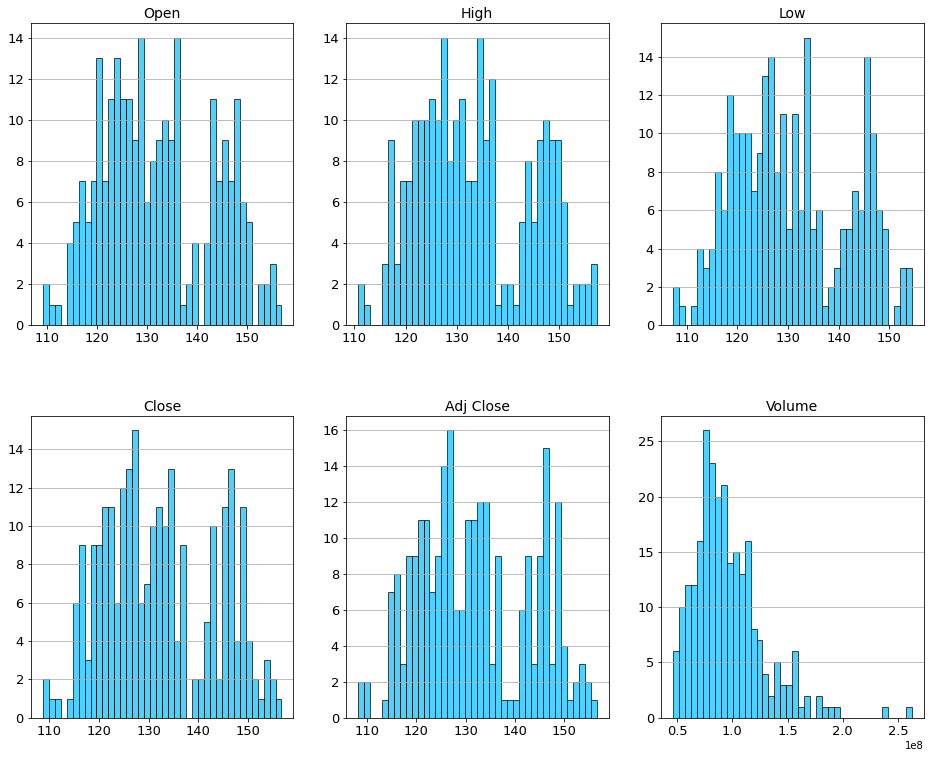

In [32]:
columns = df.columns.values
# Calculating required amount of rows to display all feature plots
cols = 3
rows = len(columns) // cols + 1

fig, axs = plt.subplots(ncols=cols, nrows=rows, figsize=(16,20), sharex=False)

# Adding some distance between plots
plt.subplots_adjust(hspace = 0.3)

# Plots counter
i=0
for r in np.arange(0, rows, 1):
    for c in np.arange(0, cols, 1):
        if i >= len(columns): # If there is no more data columns to make plots from
            axs[r, c].set_visible(False) # Hiding axes so there will be clean background
        else:
            # Train data histogram
            hist1 = axs[r, c].hist(df[columns[i]].values,
                                   range=(df[columns[i]].min(),
                                          df[columns[i]].max()),
                                   bins=40,
                                   color="deepskyblue",
                                   edgecolor="black",
                                   alpha=0.7,
                                   label="Train Dataset")
            axs[r, c].set_title(columns[i], fontsize=14, pad=5)
            axs[r, c].tick_params(axis="y", labelsize=13)
            axs[r, c].tick_params(axis="x", labelsize=13)
            axs[r, c].grid(axis="y")
            i+=1
            

##Box Plot

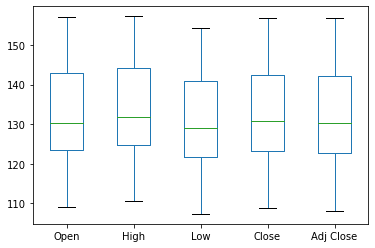

In [41]:
data[['Open','High','Low','Close','Adj Close']].plot(kind='box')

##Heat Map

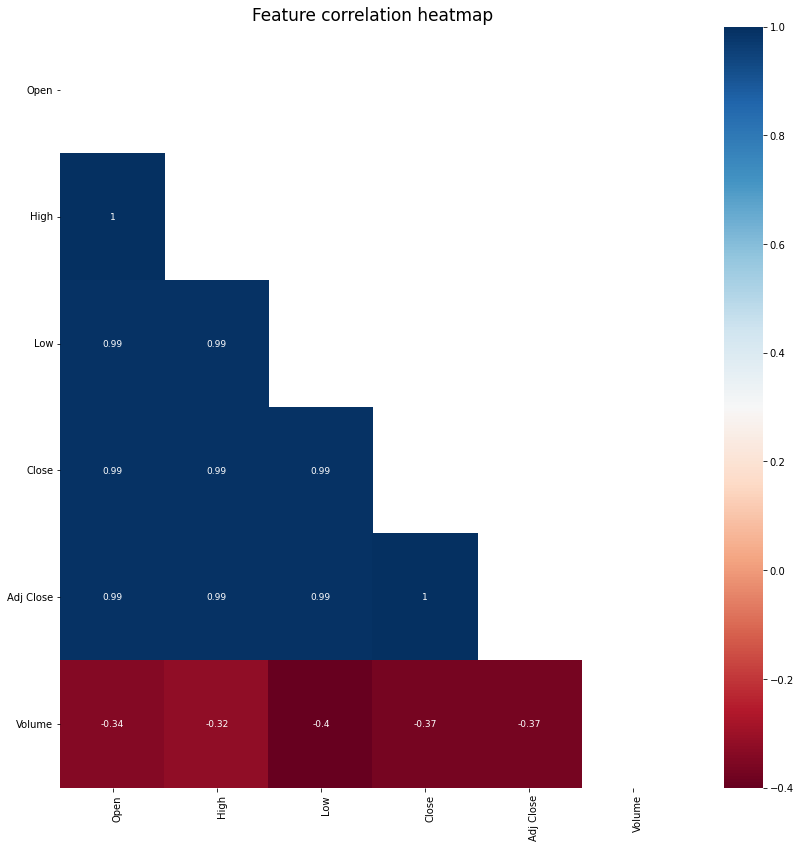

In [38]:
# Calculatin correlation values
df = df.corr().round(2)

# Mask to hide upper-right part of plot as it is a duplicate
mask = np.zeros_like(df)
mask[np.triu_indices_from(mask)] = True

# Making a plot
plt.figure(figsize=(14,14))
ax = sns.heatmap(df, annot=True, mask=mask, cmap="RdBu", annot_kws={"weight": "normal", "fontsize":9})
ax.set_title("Feature correlation heatmap", fontsize=17)
plt.setp(ax.get_xticklabels(), rotation=90, ha="right",
         rotation_mode="anchor", weight="normal")
plt.setp(ax.get_yticklabels(), weight="normal",
         rotation_mode="anchor", rotation=0, ha="right")
plt.show();